# **Understanding Gradient Descent Through Simple Linear Regression**

### **Libraries used**

In [ ]:
# Functions used through this explanation
import matplotlib.pyplot as plt
import random
from statistics import mean
from scratch.complex_typing import Vector

### **Introduction**

Gradient descent is a powerful optimization technique commonly used to fit models by minimizing their error (or loss) functions.

In this exercise, you'll learn how gradient descent works by applying it to fit a simple linear regression model.

The goal of gradient descent is to find the optimal model parameters by minimizing a cost function—such as the Mean Squared Error (MSE). But how does it actually work?

To understand that, we must first define the minimization problem: we want to find the parameter values that result in the lowest possible cost, effectively improving the model’s performance.

Keep reading to explore the step-by-step process of gradient descent and see it in action with practical examples.

### **Theoretical Framework**

**Simple Linear Regression Setup**



At this point, let's clarify what we're working with:

We're focusing on a **simple linear regression model**, which assumes a linear relationship between one independent variable \( x \) and a dependent variable \( y \). The general form of the model is:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

Where:
- $\beta_0$ is the intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term

<br>

**Cost Function (Mean Squared Error - MSE):**

Our objective is to find the values of $\beta_0$ and $\beta_1$ that minimize the cost function.
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (error)^2
$$
Where:
- $error = \hat{y}_i - y_i$
- $\hat{y}_i = \beta_0 + \beta_1 x_i$ → predicted value
- $y_i$ → actual value

By minimizing the MSE, we ensure our model fits the data as closely as possible.

**Gradient concept**

The **gradient** of a cost function $J(\theta)$ with respect to the parameters $\theta = (\theta_1, \theta_2, \ldots, \theta_n)$ is a vector composed of the partial derivatives of $J$ with respect to each parameter. Formally, the gradient is defined as:

$$
\nabla_{\theta} J(\theta) = \left( \frac{\partial J}{\partial \theta_1}, \frac{\partial J}{\partial \theta_2}, \ldots, \frac{\partial J}{\partial \theta_n} \right)
$$

Based on above we have the following about the gradient for a simple linear regression and MSE as cost function:
- $J = Cost\ Function =  MSE  =  \frac{1}{n} \sum_{i=1}^{n} (error)^2  = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2  =  \frac{1}{n} \sum_{i=1}^{n} (\beta_0 + \beta_1x_i - y_i)^2$
- $parameters = \theta = (\beta_0, \beta_1)$
- $gradient = \left( \frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1} \right)  =  \left( \frac{1}{n} \sum_{i=1}^{n} 2(\beta_0 + \beta_1x_i - y_i), \ \frac{1}{n} \sum_{i=1}^{n} 2(\beta_0 + \beta_1x_i - y_i)x_i\right)  =  \left( \frac{1}{n} \sum_{i=1}^{n} 2(error_i), \ \frac{1}{n} \sum_{i=1}^{n} 2(error_i)x_i\right)$

<br>

**Gradient Descent for Fitting**

**Gradient descent** is an optimization technique used to find the parameter values that minimize a cost function. Here's how it works step by step:

1. **Define the cost function and its gradient vector**.  
   The cost function measures how well our model performs, and the gradient vector contains the partial derivatives with respect to each parameter.

2. **Initialize parameters randomly**.  
   At the beginning, we assign random values to the parameters, represented in a vector $\theta$.

3. **Compute the gradient at the current parameter values**.  
   The gradient tells us the direction in which the cost increases the most. Each component indicates how the cost would change if we slightly increase that parameter.

4. **Update the parameters in the opposite direction of the gradient**.  
   We move against the gradient to reduce the cost. The size of this step is determined by the **learning rate** $\alpha$, a scalar that scales the gradient vector.

   $$
   \theta = \theta - \alpha \nabla_{\theta} J(\theta)
   $$

5. **Repeat the process for a number of iterations (epochs)**.  
   This process is repeated many times. Each full pass through the entire training dataset is called an **epoch**.

<br>

### **Practical exercise**

Imagine we have a phenomenon described by the following function but you don't know it:

$$
f(x) = 7x - 2
$$

We will generate the $f(x)$ values simulating x values from -20 to 20.

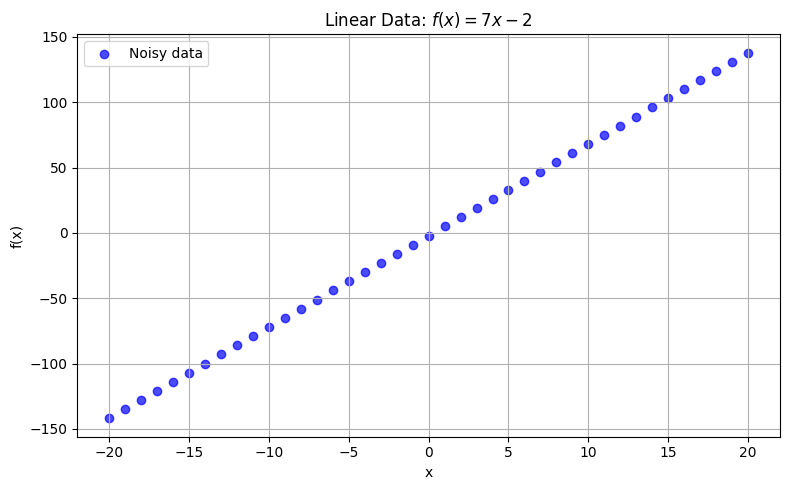

In [ ]:
x_vals = [x for x in range(-20, 21)]
y_vals = [(7 * x - 2 ) for x in x_vals]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color="blue", alpha=0.7, label="Data")
plt.title("Linear Data: $f(x) = 7x - 2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The expression we are trying to fit has the following form:

$$
f(x) = \beta_0 + \beta_1 x
$$

Where:
- $\theta = (\beta_0, \beta_1)$ represents the model parameters:
- $\beta_0$ → intercept
- $\beta_1$ → slope

And we will use the MSE as cost function.

In [ ]:
# We define the gradient function
def simple_linear_regression_gradient(
    x_vals: Vector, y_vals: Vector, theta: dict
) -> dict:
    """This function compute a simple linear regression gradient considering
    MSE as loss function.
    """
    if len(x_vals) != len(y_vals):
        raise AssertionError(
            "x_vals and y_vals vectors must have same length"
        )
    else:
        x_y_pairs = zip(
            x_vals, y_vals
        )  # Make an iterable with tuples of (x_i, y_i)
        errors = [
            (theta["intercept"] + (theta["slope"] * x)) - y
            for x, y in x_y_pairs
        ]  # Compute the error for each single pairs of (xi, yi)
        intercept_gradient = sum(
            [2 * error for x, error in zip(x_vals, errors)]
        ) / len(x_vals)
        slope_gradient = sum(
            [2 * error * x for x, error in zip(x_vals, errors)]
        ) / len(x_vals)
        return {
            "intercept_gradient": intercept_gradient,
            "slope_gradient": slope_gradient,
        }

# We define a step size function
def gradient_step(
    gradients: dir, learning_rate: float, theta: dir
) -> dir:
    """This function make a step into the opposite side of
    the parameters in a magnitud of learning rate multply by the
    it's gradient."""
    step_size_intercept = (
        -learning_rate * gradients["intercept_gradient"]
    )
    step_size_slope = -learning_rate * gradients["slope_gradient"]
    new_intercept = theta["intercept"] + step_size_intercept
    new_slope = theta["slope"] + step_size_slope
    return {"intercept": new_intercept, "slope": new_slope}

**Example with 5 epochs**

Epoch: 0 -> Intercept: 0.7880940530843438 -> Slope: 2.3086562031364775
Epoch: 1 -> Intercept: 0.7825178649781751 -> Slope: 3.622232466258264
Epoch: 2 -> Intercept: 0.7769528292482187 -> Slope: 4.56800737570595
Epoch: 3 -> Intercept: 0.7713989235897223 -> Slope: 5.248965310508284
Epoch: 4 -> Intercept: 0.7658561257425428 -> Slope: 5.739255023565964


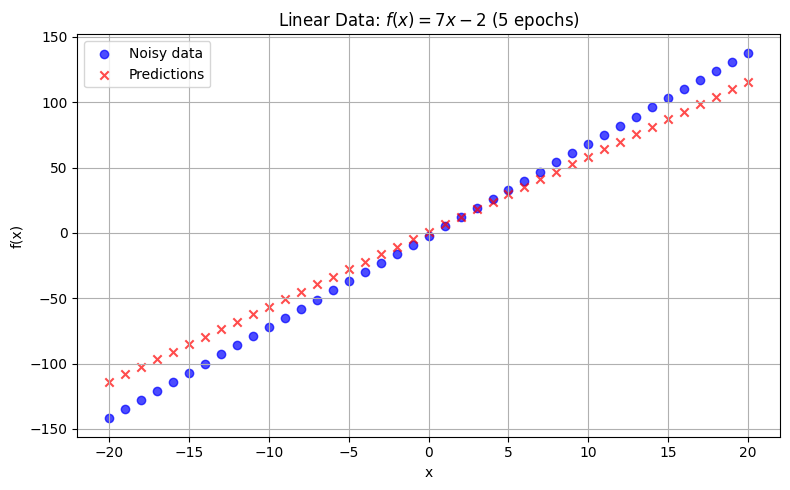

In [ ]:
# Define the epochs (how many times the model will pass through the entire training dataset)
epochs = 5

# Initialize parameter with random values
theta = {"intercept": random.random(), "slope": random.random()}

# Define the learning rate (scalar factor of the gradient to make a step in the parameters)
learning_rate = 0.001

# We iterate through the epochs
for i in range(epochs):
    gradients = simple_linear_regression_gradient(x_vals, y_vals, theta)
    theta = gradient_step(gradients, learning_rate, theta)
    if i <= 5 or i >= epochs - 5:
        print(
            f"Epoch: {i:,} -> Intercept: {theta["intercept"]} -> Slope: {theta['slope']}"
        )

y_predicted = [
    (theta["intercept"] + (theta["slope"] * x)) for x in x_vals
]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color="blue", alpha=0.7, label="Data")
plt.scatter(
    x_vals,
    y_predicted,
    color="red",
    alpha=0.7,
    label="Predictions",
    marker="x",
)
plt.title(f"Linear Data: $f(x) = 7x - 2$ ({epochs} epochs)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Example with 500 epochs**

Epoch: 0 -> Intercept: 0.958075989741463 -> Slope: 2.126393588397745
Epoch: 1 -> Intercept: 0.9521598377619801 -> Slope: 3.491003383646376
Epoch: 2 -> Intercept: 0.9462555180864561 -> Slope: 4.473522436225391
Epoch: 3 -> Intercept: 0.9403630070502832 -> Slope: 5.180936154082281
Epoch: 4 -> Intercept: 0.9344822810361826 -> Slope: 5.690274030939243
Epoch: 5 -> Intercept: 0.9286133164741103 -> Slope: 6.056997302276255
Epoch: 495 -> Intercept: -0.9019369856672975 -> Slope: 6.999999999999999
Epoch: 496 -> Intercept: -0.9041331116959629 -> Slope: 6.999999999999999
Epoch: 497 -> Intercept: -0.906324845472571 -> Slope: 6.999999999999999
Epoch: 498 -> Intercept: -0.9085121957816258 -> Slope: 6.999999999999999
Epoch: 499 -> Intercept: -0.9106951713900625 -> Slope: 6.999999999999999


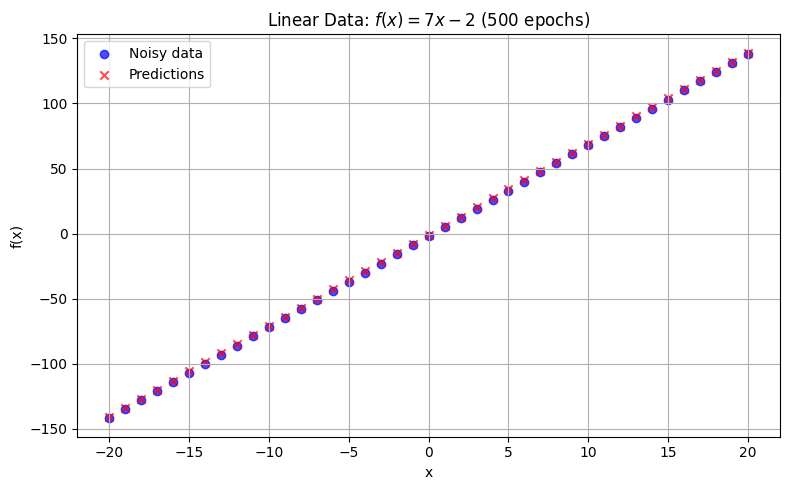

In [ ]:
# Define the epochs (how many times the model will pass through the entire training dataset)
epochs = 500

# Initialize parameter with random values
theta = {"intercept": random.random(), "slope": random.random()}

# Define the learning rate (scalar factor of the gradient to make a step in the parameters)
learning_rate = 0.001

# We iterate through the epochs
for i in range(epochs):
    gradients = simple_linear_regression_gradient(x_vals, y_vals, theta)
    theta = gradient_step(gradients, learning_rate, theta)
    if i <= 5 or i >= epochs - 5:
        print(
            f"Epoch: {i:,} -> Intercept: {theta["intercept"]} -> Slope: {theta['slope']}"
        )

y_predicted = [
    (theta["intercept"] + (theta["slope"] * x)) for x in x_vals
]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color="blue", alpha=0.7, label="Data")
plt.scatter(
    x_vals,
    y_predicted,
    color="red",
    alpha=0.7,
    label="Predictions",
    marker="x",
)
plt.title(f"Linear Data: $f(x) = 7x - 2$ ({epochs} epochs)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Example with 5000 epochs**

Epoch: 0 -> Intercept: 0.44307172744361867 -> Slope: 1.9609992737977329
Epoch: 1 -> Intercept: 0.4381855839887314 -> Slope: 3.3719194771343677
Epoch: 2 -> Intercept: 0.43330921282075396 -> Slope: 4.387782023536745
Epoch: 3 -> Intercept: 0.42844259439511245 -> Slope: 5.119203056946456
Epoch: 4 -> Intercept: 0.4235857092063222 -> Slope: 5.645826201001449
Epoch: 5 -> Intercept: 0.4187385377879096 -> Slope: 6.024994864721043
Epoch: 4,995 -> Intercept: -1.9998890850856264 -> Slope: 6.999999999999999
Epoch: 4,996 -> Intercept: -1.999889306915455 -> Slope: 6.999999999999999
Epoch: 4,997 -> Intercept: -1.9998895283016243 -> Slope: 6.999999999999999
Epoch: 4,998 -> Intercept: -1.999889749245021 -> Slope: 6.999999999999999
Epoch: 4,999 -> Intercept: -1.9998899697465309 -> Slope: 6.999999999999999


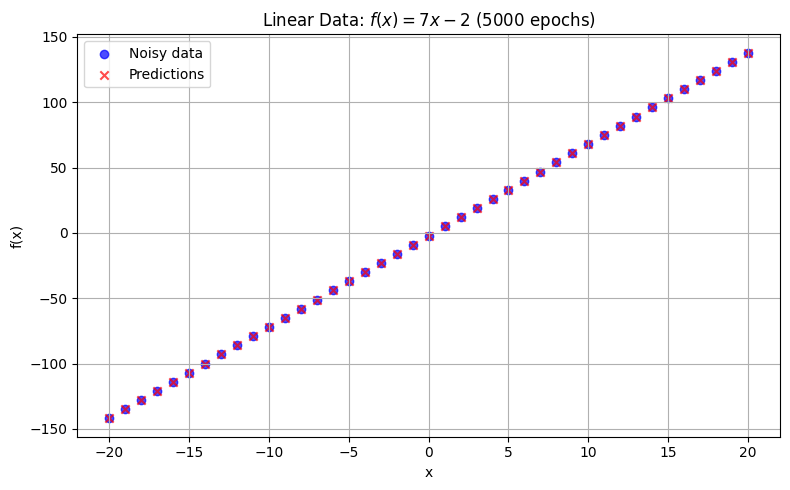

In [ ]:
# Define the epochs (how many times the model will pass through the entire training dataset)
epochs = 5000

# Initialize parameter with random values
theta = {"intercept": random.random(), "slope": random.random()}

# Define the learning rate (scalar factor of the gradient to make a step in the parameters)
learning_rate = 0.001

# We iterate through the epochs
for i in range(epochs):
    gradients = simple_linear_regression_gradient(x_vals, y_vals, theta)
    theta = gradient_step(gradients, learning_rate, theta)
    if i <= 5 or i >= epochs - 5:
        print(
            f"Epoch: {i:,} -> Intercept: {theta["intercept"]} -> Slope: {theta['slope']}"
        )

y_predicted = [
    (theta["intercept"] + (theta["slope"] * x)) for x in x_vals
]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color="blue", alpha=0.7, label="Data")
plt.scatter(
    x_vals,
    y_predicted,
    color="red",
    alpha=0.7,
    label="Predictions",
    marker="x",
)
plt.title(f"Linear Data: $f(x) = 7x - 2$ ({epochs} epochs)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**As you can see, as we increase the epochs we are hitting a closer value for the intercept and the slope!**

### Conclusion

We have explored how gradient descent can be used to fit a simple linear regression model by minimizing the Mean Squared Error (MSE) cost function. 

We defined the mathematical form of the model, computed the gradient, and broke down each step of the optimization process. By understanding how the gradients of the intercept and slope influence the direction of learning, we gained insight into how gradient descent iteratively improves model performance.

This foundational knowledge sets the stage for applying gradient descent to more complex models and loss functions in future learning tasks.

While this manual implementation helps build intuition, it's important to note that modern machine learning libraries like **scikit-learn** provide optimized and highly efficient implementations of gradient descent and other optimization algorithms. These tools allow us to focus on model design and experimentation without having to implement the optimization logic from scratch.